# TODO (2022-08-28): Talk about the representation
- NxNx3 + boundary
- symmetries
- tools

### The Board and Move classes are meant to be human-friendly in print and ML-friendly in their internal representation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
SIZE=15

#### Fastest representation for quick analysis
`print_channels`

In [3]:
import aegomoku.tools as gt
from aegomoku.gomoku_board import *

board = GomokuBoard(SIZE, game_state=None, stones="d4e5f6g7d5")

gt.print_channels(board.canonical_representation(), combine=True)

2022-09-12 18:25:34.189720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


#### We can chose between X=black and X=current

In [4]:
# For humans:  X is always black
board.plot()

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
11    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 9    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 8    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 7    .  .  .  .  .  .  O  .  .  .  .  .  .  .  .    
 6    .  .  .  .  .  X  .  .  .  .  .  .  .  .  .    
 5    .  .  . [X] O  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  X  .  .  .  .  .  .  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


In [5]:
# For ML:  X is always next player
board.plot(x_is_next=True)

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
11    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 9    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 8    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 7    .  .  .  .  .  .  X  .  .  .  .  .  .  .  .    
 6    .  .  .  .  .  O  .  .  .  .  .  .  .  .  .    
 5    .  .  . [O] X  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  O  .  .  .  .  .  .  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


### The mathematical representation $(N+1) \times (N+1) \times 3$
Observe that the board is actually larger and features three channels:
 - a channel exclusively for black stones
 - a channel exclusively for white stones
 - a channel for the 'physical' boundary of the board

---
#### All positions are validated

In [6]:
board = GomokuBoard(SIZE, game_state=None, stones="d4d16o4")

AssertionError: Not all stones in valid range

In [7]:
from aegomoku.constants_15x15 import *

In [8]:
board.act(board.Stone(D, 4))

AssertionError: D4 is occupied.

---

## Understanding board coordinates

In [9]:
# Take a minute to think about it: Stones make only sense in the context of a specific board instance!
Stone = board.Stone

In [10]:
move = Stone(A, SIZE)
# board coordinates start with 1 and end with n because the boundary stones are part of the board
print(f"{move} = ({move.r}, {move.c}) - ordinal = {move.i}")

A15 = (0, 0) - ordinal = 0


---

# Statistical Population

All moves vs all legal moves


### Legal moves are provided as ordinals to facilitate the sparse vector multiplication in the learning process
Note that the boundary positions are never showing up

In [11]:
legals = board.get_legal_actions()
print(len(legals), legals)

220 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224]


## Even better visualization with matplotlib

In [12]:
import numpy as np
import aegomoku.tools as gt
from aegomoku.utils import analyse_board
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.gomoku_board import GomokuBoard

In [13]:
BOARD_SIZE = 15

In [14]:
stones = "C11F9E9G8F7G7G9H8I8H7I6I9F6H6H9I5J4"

2022-09-12 18:26:05.071489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


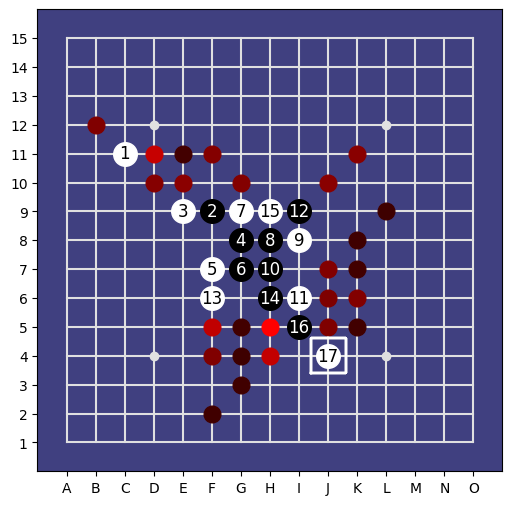

In [15]:
policy = HeuristicPolicy(BOARD_SIZE)
analyse_board(BOARD_SIZE, stones, policy)

In [16]:
board = GomokuBoard(BOARD_SIZE, stones)
Move = board.Stone

# Symmetries
The board, together with the resulting probabilities can be rotated or flipped to produce just another valid training example. In total, we 8-fold our training data.

In [17]:
from aegomoku.gomoku_board import expand

probs, v = policy.call(expand(board.canonical_representation()))

In [18]:
from aegomoku.gomoku_game import GomokuGame

gomoku = GomokuGame(15)
math_rep = board.canonical_representation()
symmetries = gomoku.get_symmetries(math_rep, probs)
symmetries[0][0].shape

(17, 17, 3)

We see the board diagonally flipped

In [19]:
gt.print_channels(symmetries[0][0])

shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 1 2 0 2 1 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 1 1 1 2 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 2 2 0 1 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


In [20]:
# See how the probabilties rotate with the board

In [21]:
for i in range(8):
    print((np.array(symmetries[i][1]).reshape(15, 15) * 100).astype(int))
    print()

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 4 2 1 0 0 4 0 0 0 0]
 [0 0 0 0 4 4 4 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 8 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 1 2 0 0 0 0 4 0 0 0 0 0]
 [0 2 0 4 6 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 1 2 4 2 0 0 0 0]
 [0 0 0 0 0 4 0 0 4 4 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 6 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 2 1 2 0 0]
 [0 0 0 0 4 0 0 0 0 0 6 4 0 2 0]
 [0 0 0 0 2 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

[[0 0 